In [1]:
# import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
%matplotlib inline

# read in the data
df = pd.read_csv(r'C:\Users\zmerl\Downloads\movies.csv\movies.csv')

In [2]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
df.shape

(7668, 15)

In [4]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
#Handling missing data
df["country"].fillna(df["country"].mode()[0],inplace=True)
df["score"] = df["score"].replace(np.nan,df['score'].median())
df["votes"] = df["votes"].replace(np.nan,df['votes'].median())
df["runtime"] = df["runtime"].replace(np.nan,df['runtime'].median())


In [6]:
#finding missing data
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          0
votes          0
director       0
writer         3
star           1
country        0
budget      2171
gross        189
company       17
runtime        0
dtype: int64

In [7]:
#delete column Released
del df['released']

In [8]:
# Data Types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [9]:
#Change type to int
df['votes'] = df['votes'].astype('int64') 
df['runtime'] = df['runtime'].astype('int64') 

In [10]:
# Data Types for our columns
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime       int64
dtype: object


In [11]:
#filling missing data in Budget with a predictive model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Specify columns to include
columns_to_include = ['budget', 'year', 'score', 'votes']
df_selected = df[columns_to_include]

# Handle missing values in selected columns
df_selected = df_selected.dropna(subset=['budget'])  # Assuming you want to drop rows with missing values in 'budget'
# If you want to impute missing values in other columns, you may consider doing it here

# Separate the data into features (X) and target variable (y)
X = df_selected.drop('budget', axis=1)
y = df_selected['budget']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to predict missing values
columns_for_prediction = ['year', 'score', 'votes']
X_missing = df[df['budget'].isnull()][columns_for_prediction]
predicted_values = model.predict(X_missing)

# Fill missing values in the original DataFrame
df.loc[df['budget'].isnull(), 'budget'] = predicted_values

# Display the DataFrame with filled missing values
df = pd.DataFrame(df)
df


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,39846344.0,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7.000000e+03,NaN,NaN,90
7664,Dream Round,NaN,Comedy,2020,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,5.224004e+07,NaN,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,5.875000e+04,NaN,Embi Productions,104
7666,It's Just Us,NaN,Drama,2020,6.5,33000,James Randall,James Randall,Christina Roz,United States,1.500000e+04,NaN,NaN,120


In [12]:
#filling missing data in Gross with a predictive model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Specify columns to include
columns_to_include = ['budget', 'year', 'score', 'votes', 'gross']
df_selected = df[columns_to_include]

# Handle missing values in selected columns
df_selected = df_selected.dropna(subset=['gross'])  # Assuming you want to drop rows with missing values in 'gross'
# If you want to impute missing values in other columns, you may consider doing it here

# Separate the data into features (X) and target variable (y)
X = df_selected.drop('gross', axis=1)
y = df_selected['gross']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to predict missing values
columns_for_prediction = ['year', 'score', 'votes', 'budget']  # Adjusted order
X_missing = df[df['gross'].isnull()][columns_for_prediction]

# Ensure that the columns in X_missing match the order used during training
X_missing = X_missing[X_train.columns]

# Make predictions on the missing data
predicted_values = model.predict(X_missing)

# Fill missing values in the original DataFrame
df.loc[df['gross'].isnull(), 'gross'] = predicted_values

# Display the DataFrame with filled missing values
df = pd.DataFrame(df)
df


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7.000000e+03,-6.202194e+07,NaN,90
7664,Dream Round,NaN,Comedy,2020,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,5.224004e+07,8.358471e+07,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,5.875000e+04,-5.190159e+07,Embi Productions,104
7666,It's Just Us,NaN,Drama,2020,6.5,33000,James Randall,James Randall,Christina Roz,United States,1.500000e+04,-3.752678e+07,NaN,120


In [13]:
df_cleaned = df.dropna(subset=['company'])

In [14]:
df.isna().sum()

name         0
rating      77
genre        0
year         0
score        0
votes        0
director     0
writer       3
star         1
country      0
budget       0
gross        0
company     17
runtime      0
dtype: int64

In [15]:
#Dropping duplicates
df.drop_duplicates()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7.000000e+03,-6.202194e+07,NaN,90
7664,Dream Round,NaN,Comedy,2020,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,5.224004e+07,8.358471e+07,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,5.875000e+04,-5.190159e+07,Embi Productions,104
7666,It's Just Us,NaN,Drama,2020,6.5,33000,James Randall,James Randall,Christina Roz,United States,1.500000e+04,-3.752678e+07,NaN,120


In [16]:
#Change type to int
df['budget'] = df['budget'].astype('int64') 
df['gross'] = df['gross'].astype('int64') 

In [ ]:
print(df.dtypes)

In [18]:
# Order our Data a little bit to see
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567,Sunrise in Heaven,Not Rated,Drama,2019,6.0,871,Waymon Boone,Dan Benamor,Caylee Cowan,United States,1100000,-47144746,Nasser Group,85
7658,Black Wall Street Burning,R,Drama,2020,6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,-48588972,Notis Studio,78
7654,Star Trek First Frontier,NaN,Sci-Fi,2020,5.7,165,Kenneth Smith,Keith Brooks,Robert Pralgo,United States,370000,-51023455,An Impulsive Production,85
7665,Saving Mbango,NaN,Drama,2020,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,-51901590,Embi Productions,104


<Axes: xlabel='gross', ylabel='budget'>

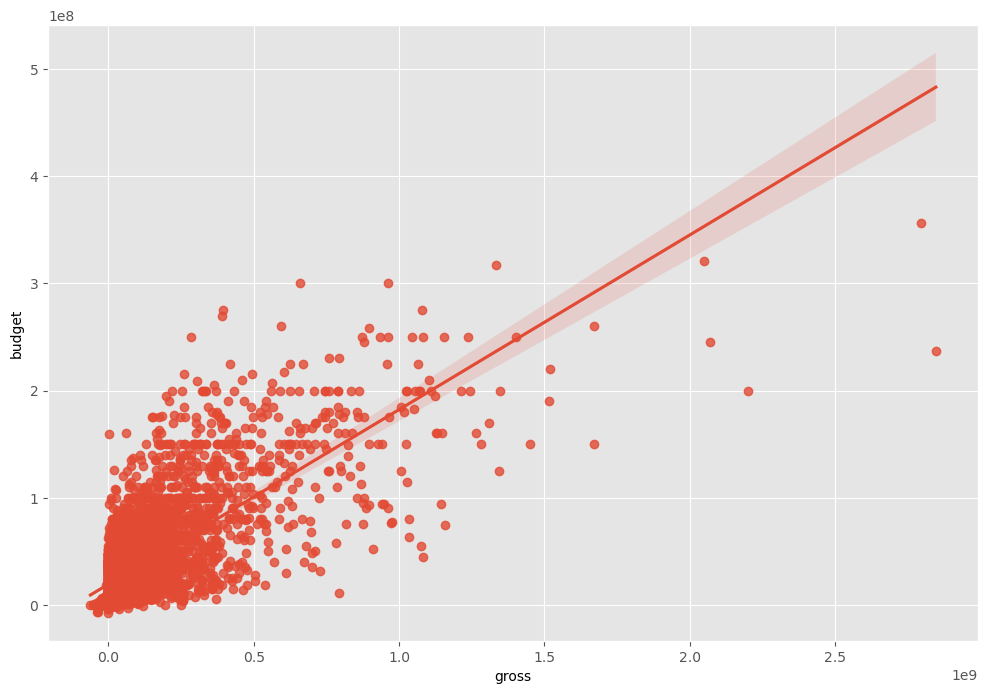

In [19]:
#to test a linear relationship between Gross and Budget
sns.regplot(x="gross", y="budget", data=df)


we can detect a linear relationship between the 2 variables gross and budget

C:\Users\zmerl\AppData\Local\Temp\ipykernel_12820\64558604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


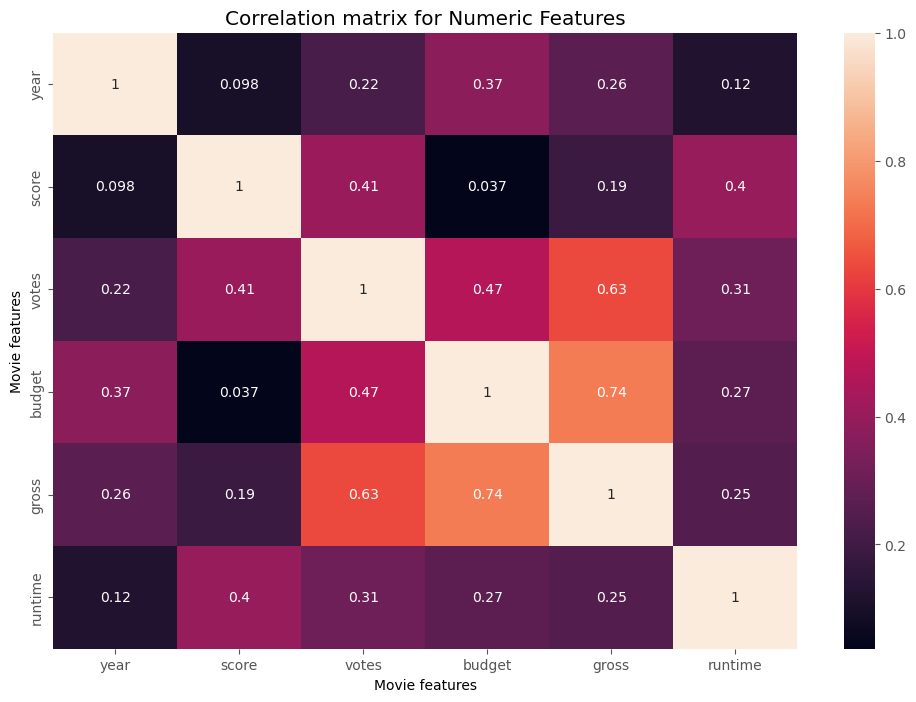

In [20]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

High correlation between budget and gross of 74%

In [21]:
# Using factorize - this assigns a random numeric value for each unique categorical value
df.apply(lambda x: x.factorize()[0]).corr()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,-0.045867,0.287866,0.745905,0.805211,0.731565,0.142952,0.370883,0.965806,0.591667,0.049009
rating,0.143938,1.000000,-0.086723,0.156713,0.012103,0.099933,0.085520,0.103623,0.093116,0.000407,0.088289,0.154252,-0.028035,0.032731
genre,0.036367,-0.086723,1.000000,0.037184,-0.002883,0.023248,0.047288,0.033688,0.038649,-0.015777,-0.014980,0.037608,0.009566,0.001447
year,0.965761,0.156713,0.037184,1.000000,-0.044107,0.312493,0.770497,0.824770,0.756400,0.140336,0.375219,0.999071,0.601571,0.050700
score,-0.045867,0.012103,-0.002883,-0.044107,1.000000,-0.010287,-0.022164,-0.033721,-0.008793,0.022951,-0.021896,-0.042421,-0.028402,0.026874
votes,0.287866,0.099933,0.023248,0.312493,-0.010287,1.000000,0.192275,0.224217,0.179706,-0.045947,0.137087,0.300060,0.008905,0.106106
director,0.745905,0.085520,0.047288,0.770497,-0.022164,0.192275,1.000000,0.748340,0.682385,0.155578,0.306578,0.772164,0.552258,-0.011022
writer,0.805211,0.103623,0.033688,0.824770,-0.033721,0.224217,0.748340,1.000000,0.675685,0.157295,0.324295,0.825516,0.546151,0.032310
star,0.731565,0.093116,0.038649,0.756400,-0.008793,0.179706,0.682385,0.675685,1.000000,0.182206,0.328411,0.757281,0.527116,0.035458
country,0.142952,0.000407,-0.015777,0.140336,0.022951,-0.045947,0.155578,0.157295,0.182206,1.000000,0.233536,0.143697,0.226364,0.124112


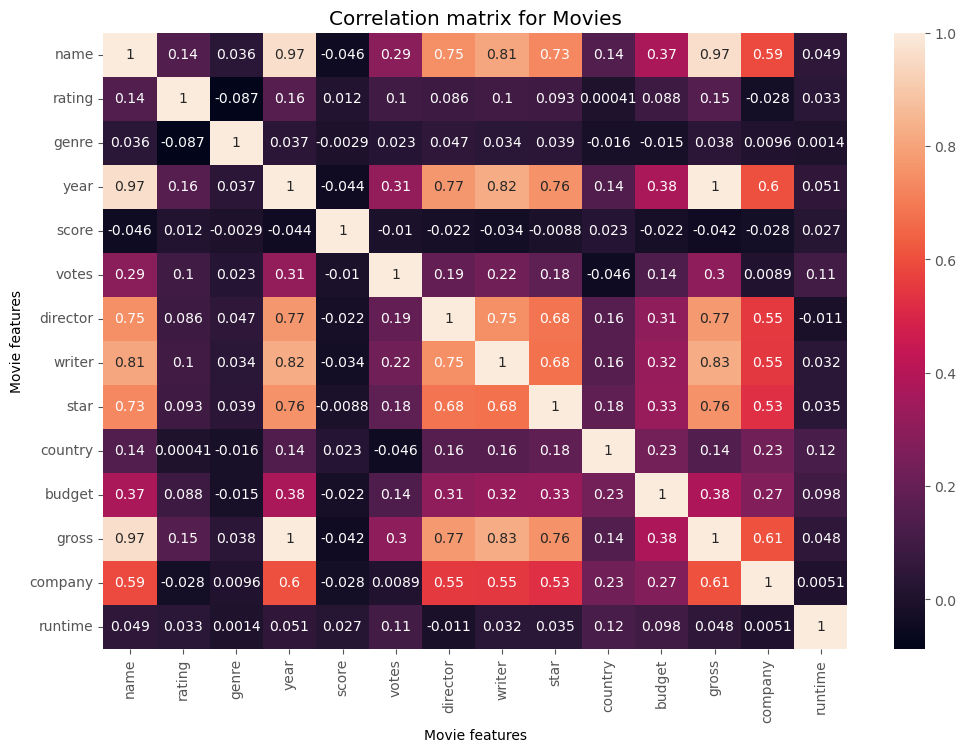

In [22]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

Gross is highly correlated with : Director, writer, star and company 

In [23]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name       1.000000
         rating     0.143938
         genre      0.036367
         year       0.965761
         score     -0.045867
                      ...   
runtime  country    0.124112
         budget     0.097953
         gross      0.047911
         company    0.005145
         runtime    1.000000
Length: 196, dtype: float64


In [24]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

rating   genre     -0.086723
genre    rating    -0.086723
country  votes     -0.045947
votes    country   -0.045947
name     score     -0.045867
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 196, dtype: float64


In [25]:
# We can now take a look at the ones that have a high correlation (> 0.6)
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.6) & (abs(sorted_pairs) < 0.9)]

print(strong_pairs)

company   year        0.601571
year      company     0.601571
company   gross       0.606729
gross     company     0.606729
star      writer      0.675685
writer    star        0.675685
director  star        0.682385
star      director    0.682385
          name        0.731565
name      star        0.731565
          director    0.745905
director  name        0.745905
writer    director    0.748340
director  writer      0.748340
star      year        0.756400
year      star        0.756400
gross     star        0.757281
star      gross       0.757281
year      director    0.770497
director  year        0.770497
gross     director    0.772164
director  gross       0.772164
name      writer      0.805211
writer    name        0.805211
year      writer      0.824770
writer    year        0.824770
          gross       0.825516
gross     writer      0.825516
dtype: float64


gross and writer has the highest correlation of 0.82

In [26]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56476092465
Universal Pictures           52503426761
Columbia Pictures            43008941346
Paramount Pictures           40493759329
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9225409457
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

Warner Bros has the highest gross revenue from its films

In [27]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,-62021938,NaN,90
7664,Dream Round,NaN,Comedy,2020,4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,52240042,83584707,Cactus Blue Entertainment,90
7665,Saving Mbango,NaN,Drama,2020,5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,-51901590,Embi Productions,104
7666,It's Just Us,NaN,Drama,2020,6.5,33000,James Randall,James Randall,Christina Roz,United States,15000,-37526780,NaN,120


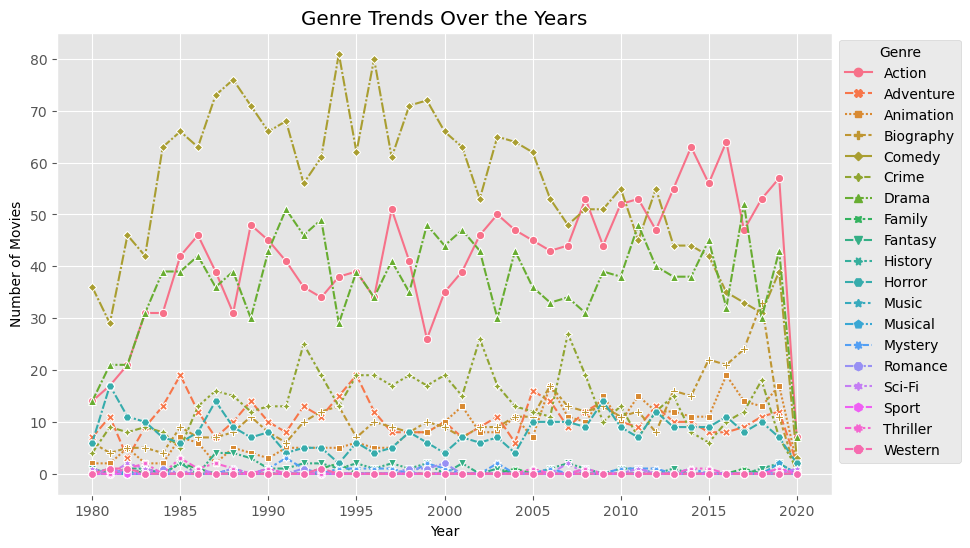

In [32]:
# Group by 'Year' and 'Genre' and count the number of movies in each genre for each year
genre_counts = df.groupby(['year', 'genre']).size().reset_index(name='MovieCount')

# Pivot the table for better visualization
genre_trends = genre_counts.pivot(index='year', columns='genre', values='MovieCount').fillna(0)

# Plotting the genre trends over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=genre_trends, markers=True)
plt.title('Genre Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Comedy was the top genre for more than 20 years, and it dropped and action have become top genre since 2013

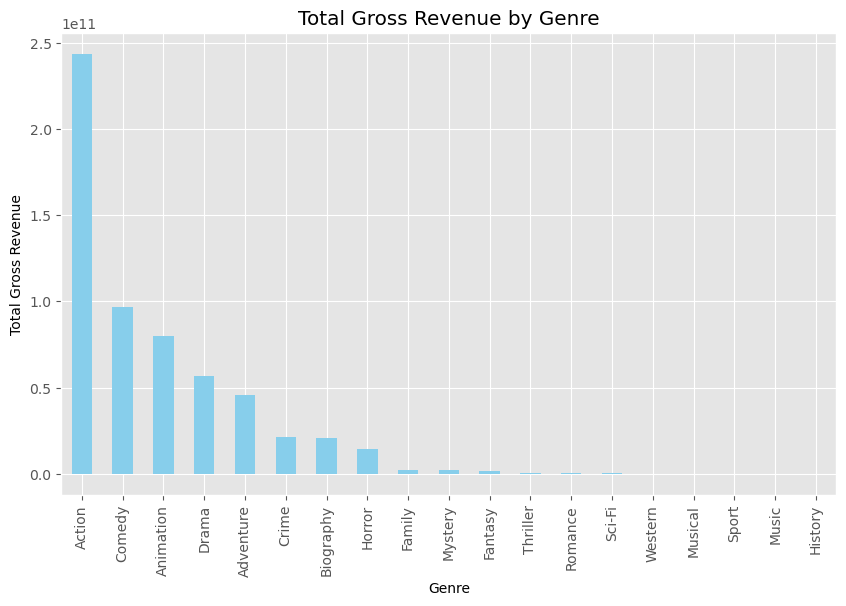

In [44]:
# Plot Genre vs. Gross
plt.figure(figsize=(10, 6))
genre_gross = df.groupby('genre')['gross'].sum().sort_values(ascending=False)
genre_gross.plot(kind='bar', color='skyblue')
plt.title('Total Gross Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Gross Revenue')
plt.show()

Action movies have the highest gross revenue